In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Используем съёмку с КА "Метеор-М", аппаратура КМСС
Синтез каналов NIR-R-G. 27.11.2023 -- Айсберг А23а

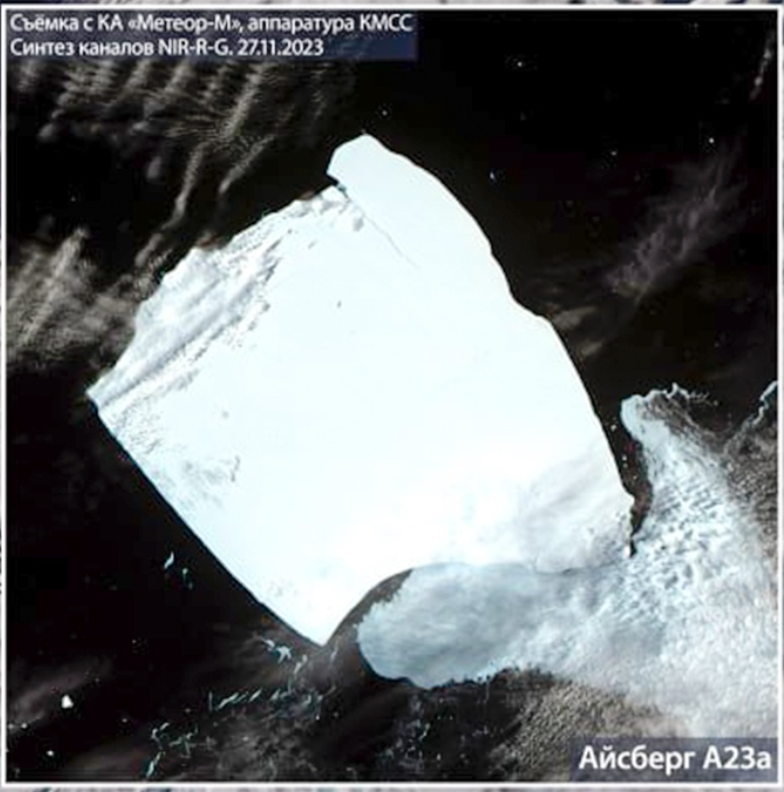

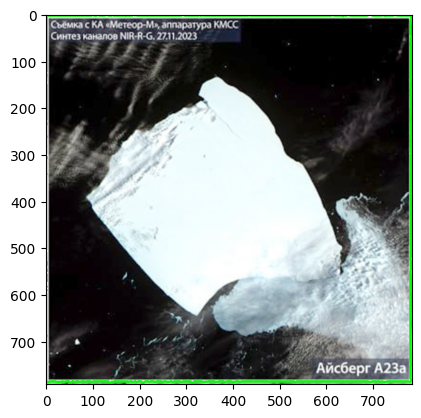

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path)
    # Преобразование в серый формат
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Применение Gaussian Blur для сглаживания
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    # Применение адаптивного порога
    thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh

def extract_largest_contour(thresh):
    # Нахождение контуров
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Поиск самого крупного контура
    largest_contour = max(contours, key=cv2.contourArea)-1
    return largest_contour

def draw_contour(image, contour):
    # Отрисовка контура на изображении
    image_contour = cv2.drawContours(image.copy(), [contour], -1, (0, 255, 0), 3)
    return image_contour

# Загрузка и обработка изображения
image_path = '/content/sample_data/Ice.png'
thresh_image = load_and_preprocess_image(image_path)

# Извлечение самого крупного контура
largest_contour = extract_largest_contour(thresh_image)

# Отрисовка контура
contour_image = draw_contour(cv2.imread(image_path), largest_contour)

# Визуализация
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()


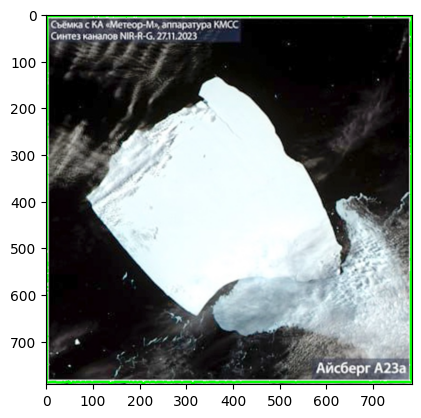

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path)
    # Преобразование в серый формат
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Применение Gaussian Blur для сглаживания
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    # Применение адаптивного порога
    thresh = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh

def extract_largest_contour(thresh):
    # Нахождение контуров
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Фильтрация контуров по площади (игнорируем слишком большие и слишком маленькие)
    filtered_contours = [cnt for cnt in contours if 5000 < cv2.contourArea(cnt) < 1000000]

    if not filtered_contours:
        raise ValueError("No valid contours found")

    # Поиск самого крупного контура среди отфильтрованных
    largest_contour = max(filtered_contours, key=cv2.contourArea)
    return largest_contour

def draw_contour(image, contour):
    # Отрисовка контура на изображении
    image_contour = cv2.drawContours(image.copy(), [contour], -1, (0, 255, 0), 3)
    return image_contour

# Загрузка и обработка изображения
image_path = '/content/sample_data/Ice.png'  # Используем путь к новому изображению
thresh_image = load_and_preprocess_image(image_path)

# Извлечение самого крупного контура после фильтрации
largest_contour = extract_largest_contour(thresh_image)

# Отрисовка контура
contour_image = draw_contour(cv2.imread(image_path), largest_contour)

# Визуализация
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()


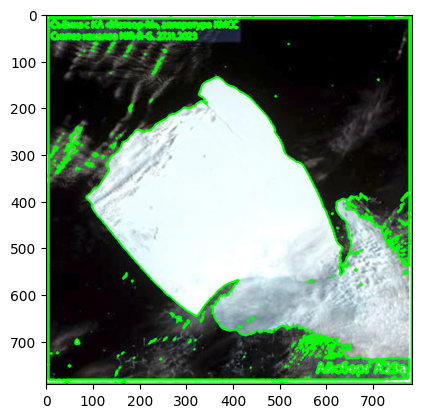

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path)
    # Преобразование в удобный цветовой формат
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Пороговая фильтрация
    _, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    return thresh

def extract_contours(thresh):
    # Нахождение контуров
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def draw_contours(image, contours):
    # Отрисовка контуров на изображении айсберга
    image_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 3)
    return image_contours

# Загрузка и обработка изображения
image_path = '/content/sample_data/Ice.png'  # Путь к изображению айсберга
thresh_image = load_and_preprocess_image(image_path)

# Извлечение и отрисовка контуров
contours = extract_contours(thresh_image)
contour_image = draw_contours(cv2.imread(image_path), contours)

# Визуализация
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()


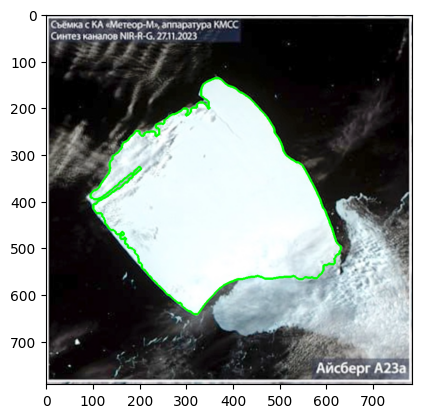

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path)
    # Преобразование в формат HSV для цветовой фильтрации
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Определение диапазона белого цвета в HSV
    lower_white = np.array([0, 0, 200], dtype=np.uint8)
    upper_white = np.array([180, 30, 255], dtype=np.uint8)

    # Создание маски для белого цвета
    mask = cv2.inRange(hsv_image, lower_white, upper_white)

    # Применение морфологических операций для удаления шума
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.erode(mask, kernel, iterations = 2)
    mask = cv2.dilate(mask, kernel, iterations = 2)

    # Преобразование результата в серый формат
    gray_image = cv2.bitwise_and(image, image, mask=mask)
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)

    # Применение размытия для уменьшения шума
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Применение пороговой обработки
    _, thresh = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)

    return thresh

def extract_largest_contour(thresh):
    # Нахождение контуров
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Фильтрация контуров по площади (игнорируем слишком большие и слишком маленькие)
    filtered_contours = [cnt for cnt in contours if 1000 < cv2.contourArea(cnt) < 1000000]

    if not filtered_contours:
        raise ValueError("No valid contours found")

    # Поиск самого крупного контура среди отфильтрованных
    largest_contour = max(filtered_contours, key=cv2.contourArea)
    return largest_contour

def draw_contour(image, contour):
    # Отрисовка контура на изображении
    image_contour = cv2.drawContours(image.copy(), [contour], -1, (0, 255, 0), 3)
    return image_contour

# Загрузка и обработка изображения
image_path = '/content/sample_data/Ice.png'  # Используем путь к изображению
thresh_image = load_and_preprocess_image(image_path)

# Извлечение самого крупного контура после фильтрации
largest_contour = extract_largest_contour(thresh_image)

# Отрисовка контура
contour_image = draw_contour(cv2.imread(image_path), largest_contour)

# Визуализация
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()


Изображение загружается с помощью `cv2.imread()`, которое возвращает изображение в формате BGR (синий, зеленый, красный).
Преобразование в формат HSV (`Hue, Saturation, Value`), который более удобен для цветовой фильтрации, особенно для работы с цветами, такими как белый.

`lower_white` и `upper_white` задают диапазон значений, которые соответствуют белому цвету в формате HSV. В данном случае оттенок (Hue) варьируется от 0 до 180, а насыщенность (Saturation) — от 0 до 30, что соответствует почти полностью белым цветам.

`GaussianBlur()` уменьшает шум на изображении.
`cv2.threshold()` превращает изображение в двоичное (черно-белое) на основе порога в 127.

`cv2.findContours()` находит все внешние контуры на бинарном изображении.

**Этот код загружает изображение, выполняет цветовую фильтрацию для выделения белых областей (например, айсберга на изображении), находит самый крупный контур и визуализирует его на изображении.**

In [ ]:
import numpy as np

# Начальные координаты айсберга (например, центр контура)
initial_position = np.array([350, 350])

# Генерация синтетических данных для скорости ветра и течений (в м/с)
# Предположим, что данные собраны каждые 10 минут
time_steps = 100  # количество временных шагов
wind_speed = np.random.uniform(0, 10, time_steps)  # скорость ветра
wind_direction = np.random.uniform(0, 2*np.pi, time_steps)  # направление ветра (в радианах)
current_speed = np.random.uniform(0, 2, time_steps)  # скорость течений
current_direction = np.random.uniform(0, 2*np.pi, time_steps)  # направление течений (в радианах)

# Начальные координаты для хранения предсказанных позиций
positions = [initial_position]


In [ ]:
for t in range(1, time_steps):
    # Прогнозирование изменения положения на основе ветра
    delta_x_wind = wind_speed[t] * np.cos(wind_direction[t])
    delta_y_wind = wind_speed[t] * np.sin(wind_direction[t])

    # Прогнозирование изменения положения на основе течений
    delta_x_current = current_speed[t] * np.cos(current_direction[t])
    delta_y_current = current_speed[t] * np.sin(current_direction[t])

    # Комбинация изменений положения
    delta_x = delta_x_wind + delta_x_current
    delta_y = delta_y_wind + delta_y_current

    # Новая позиция
    new_position = positions[-1] + np.array([delta_x, delta_y])
    positions.append(new_position)


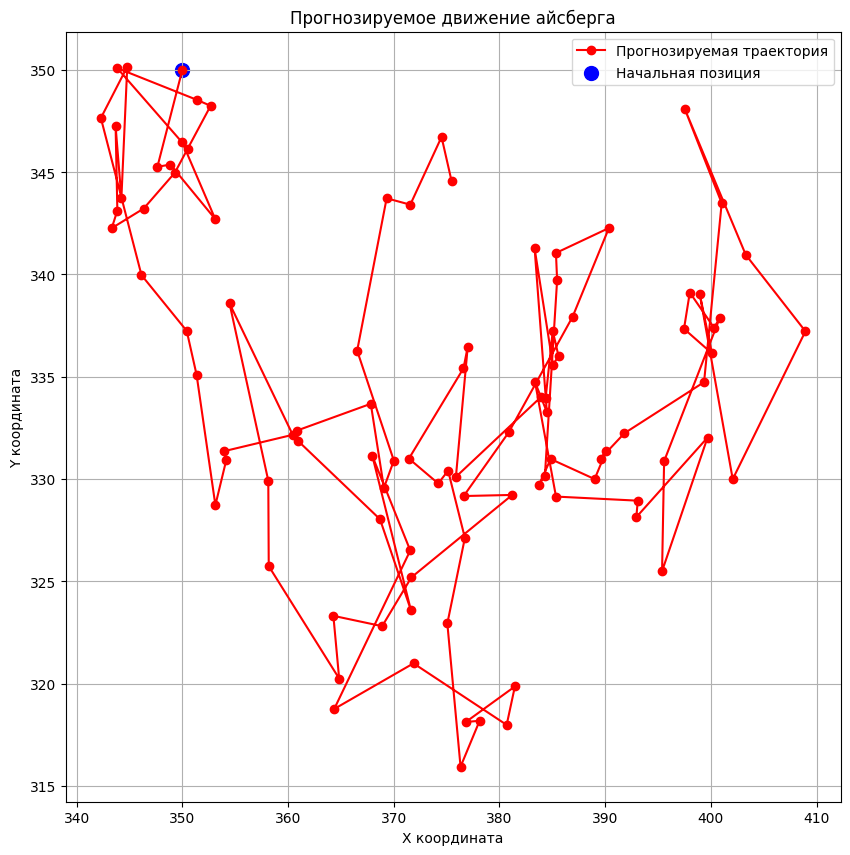

In [ ]:
import matplotlib.pyplot as plt

# Преобразование позиций в массив для удобной визуализации
positions = np.array(positions)

# Визуализация траектории айсберга
plt.figure(figsize=(10, 10))
plt.plot(positions[:, 0], positions[:, 1], marker='o', color='r', label="Прогнозируемая траектория")
plt.scatter(initial_position[0], initial_position[1], color='b', label="Начальная позиция", s=100)
plt.title("Прогнозируемое движение айсберга")
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.legend()
plt.grid(True)
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/drawing.cpp:2504: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


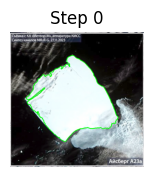

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка и обработка изображения
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_white = np.array([0, 0, 200], dtype=np.uint8)
    upper_white = np.array([180, 30, 255], dtype=np.uint8)
    mask = cv2.inRange(hsv_image, lower_white, upper_white)
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.erode(mask, kernel, iterations = 2)
    mask = cv2.dilate(mask, kernel, iterations = 2)
    gray_image = cv2.bitwise_and(image, image, mask=mask)
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    _, thresh = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)
    return thresh, image

def extract_largest_contour(thresh):
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if 1000 < cv2.contourArea(cnt) < 1000000]
    if not filtered_contours:
        raise ValueError("No valid contours found")
    largest_contour = max(filtered_contours, key=cv2.contourArea)
    return largest_contour

# Функция для перемещения контура
def move_contour(contour, delta_x, delta_y):
    # Перемещение контура путем добавления смещения к каждой точке
    moved_contour = contour + np.array([delta_x, delta_y], dtype=np.float32)
    return moved_contour

# Начальная обработка изображения
image_path = '/content/sample_data/Ice.png'  # Используем путь к изображению
thresh_image, original_image = load_and_preprocess_image(image_path)
largest_contour = extract_largest_contour(thresh_image)

# Начальные параметры движения (например, через каждый час)
time_steps = 5
wind_speed = 5  # скорость ветра в м/с
current_speed = 1  # скорость течений в м/с
wind_direction = np.deg2rad(45)  # направление ветра (угол в радианах)
current_direction = np.deg2rad(90)  # направление течения (угол в радианах)

# Начальная позиция айсберга - его контур
positions = [largest_contour]

# Прогнозирование и перемещение контура
for t in range(1, time_steps):
    # Расчет смещения
    delta_x_wind = wind_speed * np.cos(wind_direction) * t
    delta_y_wind = wind_speed * np.sin(wind_direction) * t
    delta_x_current = current_speed * np.cos(current_direction) * t
    delta_y_current = current_speed * np.sin(current_direction) * t
    delta_x = delta_x_wind + delta_x_current
    delta_y = delta_y_wind + delta_y_current

    # Перемещение контура
    new_position = move_contour(positions[-1], delta_x, delta_y)
    positions.append(new_position)

# Визуализация движения айсберга
plt.figure(figsize=(10, 10))
for idx, position in enumerate(positions):
    original_image_copy = original_image.copy()
    cv2.drawContours(original_image_copy, [position], -1, (0, 255, 0), 3)
    plt.subplot(1, time_steps, idx + 1)
    plt.imshow(cv2.cvtColor(original_image_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"Step {idx}")
    plt.axis('off')
plt.show()


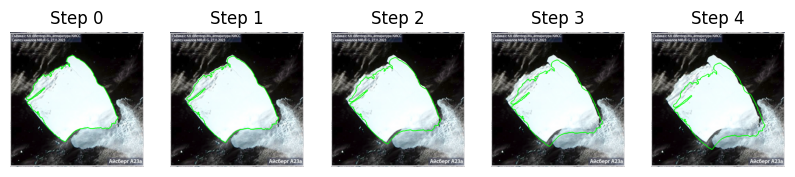

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка и обработка изображения
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_white = np.array([0, 0, 200], dtype=np.uint8)
    upper_white = np.array([180, 30, 255], dtype=np.uint8)
    mask = cv2.inRange(hsv_image, lower_white, upper_white)
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.erode(mask, kernel, iterations = 2)
    mask = cv2.dilate(mask, kernel, iterations = 2)
    gray_image = cv2.bitwise_and(image, image, mask=mask)
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    _, thresh = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)
    return thresh, image

def extract_largest_contour(thresh):
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [cnt for cnt in contours if 1000 < cv2.contourArea(cnt) < 1000000]
    if not filtered_contours:
        raise ValueError("No valid contours found")
    largest_contour = max(filtered_contours, key=cv2.contourArea)
    return largest_contour

# Функция для перемещения контура
def move_contour(contour, delta_x, delta_y):
    # Перемещение контура путем добавления смещения к каждой точке
    moved_contour = contour + np.array([delta_x, delta_y], dtype=np.float32)
    return moved_contour

# Начальная обработка изображения
image_path = '/content/sample_data/Ice.png'  # Используем путь к изображению
thresh_image, original_image = load_and_preprocess_image(image_path)
largest_contour = extract_largest_contour(thresh_image)

# Начальные параметры движения (например, через каждый час)
time_steps = 5
wind_speed = 5  # скорость ветра в м/с
current_speed = 1  # скорость течений в м/с
wind_direction = np.deg2rad(45)  # направление ветра (угол в радианах)
current_direction = np.deg2rad(90)  # направление течения (угол в радианах)

# Начальная позиция айсберга - его контур
positions = [largest_contour]

# Прогнозирование и перемещение контура
for t in range(1, time_steps):
    # Расчет смещения
    delta_x_wind = wind_speed * np.cos(wind_direction) * t
    delta_y_wind = wind_speed * np.sin(wind_direction) * t
    delta_x_current = current_speed * np.cos(current_direction) * t
    delta_y_current = current_speed * np.sin(current_direction) * t
    delta_x = delta_x_wind + delta_x_current
    delta_y = delta_y_wind + delta_y_current

    # Перемещение контура
    new_position = move_contour(positions[-1], delta_x, delta_y)

    # Проверка на валидность контура
    if new_position.size > 0:
        positions.append(new_position)
    else:
        print(f"Step {t}: Invalid contour generated, skipping this step.")
        continue

# Визуализация движения айсберга
plt.figure(figsize=(10, 10))
for idx, position in enumerate(positions):
    original_image_copy = original_image.copy()
    cv2.drawContours(original_image_copy, [position.astype(int)], -1, (0, 255, 0), 3)
    plt.subplot(1, time_steps, idx + 1)
    plt.imshow(cv2.cvtColor(original_image_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"Step {idx}")
    plt.axis('off')
plt.show()


**Этот код представляет собой пример использования LSTM (Long Short-Term Memory) нейронной сети для прогнозирования данных на основе искусственно сгенерированных временных рядов, связанных с движением и скоростями, такими как скорость ветра и течения.**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Пример генерации данных (искусственных) для обучения
def generate_data(time_steps):
    wind_speed = np.random.uniform(0, 10, time_steps)
    wind_direction = np.random.uniform(0, 2*np.pi, time_steps)
    current_speed = np.random.uniform(0, 2, time_steps)
    current_direction = np.random.uniform(0, 2*np.pi, time_steps)
    x = wind_speed * np.cos(wind_direction) + current_speed * np.cos(current_direction)
    y = wind_speed * np.sin(wind_direction) + current_speed * np.sin(current_direction)
    return np.array([x, y]).T

# Подготовка данных для LSTM
time_steps = 100
data = generate_data(time_steps)

# Формируем данные для LSTM
X_train = np.array([data[i:i+10] for i in range(time_steps-10)])
y_train = data[10:]

# Создание модели LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(10, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

# Обучение модели
model.fit(X_train, y_train, epochs=200, verbose=0)

# Прогнозирование следующего шага
prediction = model.predict(np.array([data[-10:]]))
print("Predicted next position:", prediction)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted next position: [[  1.7123659 -10.777194 ]]


`X_train` будет содержать последовательности размером (90, 10, 2) — 90 выборок, каждая из которых содержит 10 шагов с 2 значениями (координатами x и y).
`y_train` содержит следующие временные шаги после каждого из 10 временных интервалов. Это будет использоваться как правильные ответы для обучения.

Используется последовательная модель (`Sequential`), которая означает, что слои добавляются последовательно один за другим.

`LSTM` слой с 50 нейронами. Этот слой обрабатывает последовательности длиной 10 временных шагов с 2 входными признаками (x и y координаты). `activation='relu'` — функция активации ReLU (`Rectified Linear Unit`).
`LSTM` слой умеет «запоминать» и использовать зависимость между временными шагами, что делает его подходящим для задач с временными рядами.